# Digital Art Project

In [1]:
!pip install --upgrade diffusers transformers accelerate torch ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 41.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/13/30/54b59e73400df3de506ad8630284e9fd63f4b94f735423d55fc342181037/transformers-4.33.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 31.8 MB/s eta 0:00:00
  Obtaining dependency information for accelerate from https://files.pythonhosted.org/packages/4d/a7/05c67003d659a0035f2b3a8cf389c1d9645865aee84a73ce99ddab16682f/accelerate-0.22.0-py3-none-any.whl.metadata
  Using cached accelerate-0.22.0-py3-none-any.whl.metadata (17 kB)
  Using cached torch-2.0.1-cp38-cp38-manylinux1_x86_64.whl (619.9 MB)
  Obtaining dependency information for huggingface-hub>=0.13.2 from https://files.pythonhosted.org/packages/7f/c4/adcbe9a696c135578cabcbdd7331332daad4

# Text to image

In [2]:
import datetime

In [3]:
# Download the model and set up the pipeline - this version requires a NVidia GPA (cuda)
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

# Find models to use here: https://huggingface.co/models?pipeline_tag=text-to-image&sort=trending

model_id = "stabilityai/stable-diffusion-2-1"
# model_id = "runwayml/stable-diffusion-v1-5"
# model_id = "hakurei/waifu-diffusion"
# model_id = "dreamlike-art/dreamlike-photoreal-2.0"  # Read comments on huggingface hub - possibility of non-appropriate results

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Start: 2023-09-08 16:40:19.871431 


  0%|          | 0/50 [00:00<?, ?it/s]

End: 2023-09-08 16:40:38.189831 


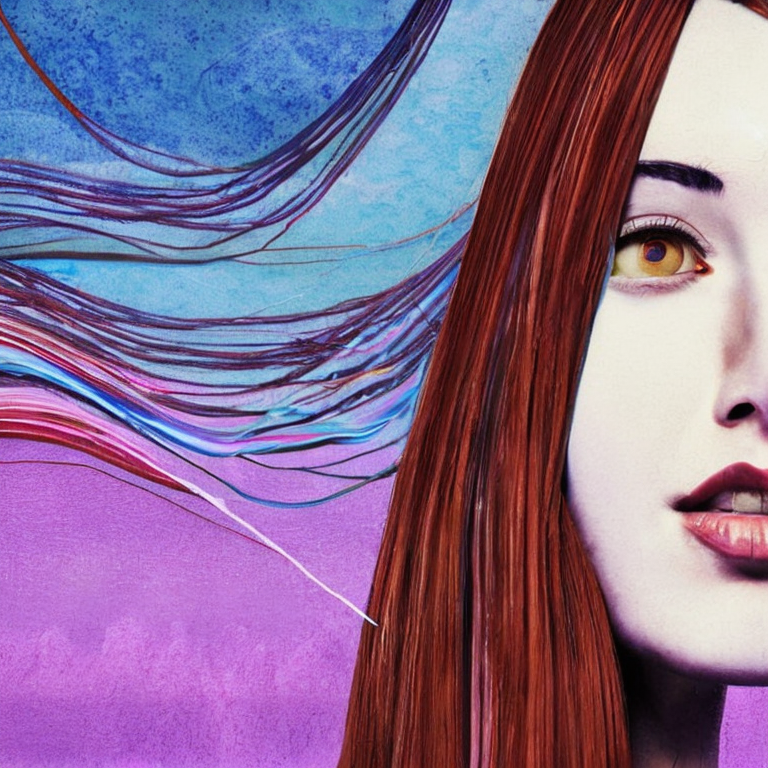

In [4]:
# Create a prompt and generate an image (NOTE: the image is not saved to disk until the next step)
# prompt = "a group of people walking across a towering bridge made of binary code that leads to a futuristic utopia"
# prompt = "Two people walking along a roadway made of binary code that leads to a futuristic utopia "
prompt = """
a computer with data flowing out of it into the long hair of a savvy feminine technologist as a surrealist painting
"""

print("Start: {now} ".format(now=datetime.datetime.now()))
image = pipe(prompt).images[0]

now = datetime.datetime.now()
print("End: {now} ".format(now=now))

image

In [5]:
image.save("./results/gpt-{now}.png".format(now=now))

In [5]:
import PIL
import requests
import torch
from io import BytesIO

from diffusers import StableDiffusionInpaintPipeline

def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

pipe = StableDiffusionInpaintPipeline.from_pretrained("runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "Face of a yellow cat, high resolution, sitting on a park bench"
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
image.save('yellow_cat.png')

vae/diffusion_pytorch_model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

![](yellow_cat.png)